In [31]:
import pandas as pd
from sqlalchemy import create_engine
import pymysql.cursors
import matplotlib.pyplot as plt  

In [32]:
df = pd.read_csv("WorldSustainabilityDataset.csv")
df_2014 = df.loc[df['Year'] == 2014]
# df_2014 = df.groupby(by = ["Country Name"])
df_2014.set_index("Country Name")

,Country Code,Year,Access to electricity (% of population) - EG.ELC.ACCS.ZS,Adjusted net national income per capita (annual % growth) - NY.ADJ.NNTY.PC.KD.ZG,"Adjusted net savings, excluding particulate emission damage (% of GNI) - NY.ADJ.SVNX.GN.ZS",Adjusted savings: carbon dioxide damage (% of GNI) - NY.ADJ.DCO2.GN.ZS,Adjusted savings: natural resources depletion (% of GNI) - NY.ADJ.DRES.GN.ZS,Adjusted savings: net forest depletion (% of GNI) - NY.ADJ.DFOR.GN.ZS,Adjusted savings: particulate emission damage (% of GNI) - NY.ADJ.DPEM.GN.ZS,"Automated teller machines (ATMs) (per 100,000 adults) - FB.ATM.TOTL.P5",...,Gini index (World Bank estimate) - SI.POV.GINI,Income Classification (World Bank Definition),Individuals using the Internet (% of population) - IT.NET.USER.ZS,"Life expectancy at birth, total (years) - SP.DYN.LE00.IN","Population, total - SP.POP.TOTL",Regime Type (RoW Measure Definition),Rural population (% of total population) - SP.RUR.TOTL.ZS,Total natural resources rents (% of GDP) - NY.GDP.TOTL.RT.ZS,Urban population (% of total population) - SP.URB.TOTL.IN.ZS,World Regions (UN SDG Definition)
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,ABW,2014,100.000000,NaN,4.511939,1.103057,0.001750,0.001750,NaN,117.937172,...,NaN,High income,83.78000,75.583,103776.0,NaN,56.959,0.003265,43.041,Latin America and Caribbean
Angola,AGO,2014,32.000000,4.921016,2.607538,1.101677,19.579284,0.000000,0.767450,18.192154,...,NaN,Upper-middle income,21.40000,58.776,26941773.0,Electoral Autocracy,37.269,23.671037,62.731,Sub-Saharan Africa
Albania,ALB,2014,99.950000,0.893149,0.876869,1.383816,1.991888,0.052012,0.255055,34.750044,...,34.6,Upper-middle income,54.30000,77.813,2889104.0,Electoral Democracy,43.577,3.075782,56.423,Europe and Northern America
United Arab Emirates,ARE,2014,100.000000,5.325414,NaN,1.884624,6.777784,0.000000,0.128317,61.115985,...,NaN,High income,90.40000,77.095,9214182.0,Closed Autocracy,14.625,24.244046,85.375,Northern Africa and Western Asia
Argentina,ARG,2014,100.000000,-4.501896,4.591212,1.279987,2.173093,0.000000,0.137516,45.668014,...,41.6,High income,64.70000,75.913,42669500.0,Electoral Democracy,8.623,2.733558,91.377,Latin America and Caribbean
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,VNM,2014,99.200000,6.812579,13.798179,3.174927,2.689734,0.218216,0.358825,22.688400,...,34.8,Lower-middle income,41.00000,75.056,91713850.0,Electoral Autocracy,66.885,7.160251,33.115,Eastern and South-Eastern Asia
Vanuatu,VUT,2014,49.077171,0.145677,27.109078,0.632310,0.000000,0.000000,2.670525,35.243271,...,NaN,Lower-middle income,18.80000,69.719,263888.0,Electoral Democracy,75.139,0.934715,24.861,Oceania
South Africa,ZAF,2014,86.000000,0.717356,0.911681,4.773627,2.192677,0.045588,0.538952,65.499992,...,63.0,Upper-middle income,49.00000,61.968,54544184.0,Electoral Democracy,35.688,4.154430,64.312,Sub-Saharan Africa


In [33]:
environment_df = df_2014[["Country Name","Adjusted savings: natural resources depletion (% of GNI) - NY.ADJ.DRES.GN.ZS","Adjusted savings: carbon dioxide damage (% of GNI) - NY.ADJ.DCO2.GN.ZS"]]
environment_df.rename(columns={"Adjusted savings: natural resources depletion (% of GNI) - NY.ADJ.DRES.GN.ZS":"Adjusted_savings_natural_resources_depletion","Adjusted savings: carbon dioxide damage (% of GNI) - NY.ADJ.DCO2.GN.ZS":"Adjusted_savings_carbon_dioxide_damage"}, inplace=True)

/var/folders/wm/d5dlldtd761c3pdx78hpgpg40000gn/T/ipykernel_1677/1899132846.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  environment_df.rename(columns={"Adjusted savings: natural resources depletion (% of GNI) - NY.ADJ.DRES.GN.ZS":"Adjusted_savings_natural_resources_depletion","Adjusted savings: carbon dioxide damage (% of GNI) - NY.ADJ.DCO2.GN.ZS":"Adjusted_savings_carbon_dioxide_damage"}, inplace=True)


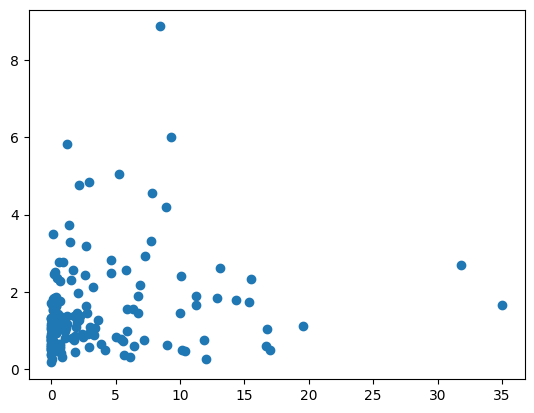

In [34]:
plt.scatter(environment_df['Adjusted_savings_natural_resources_depletion'],environment_df['Adjusted_savings_carbon_dioxide_damage'])

In [35]:
environment_df['Adjusted_savings_natural_resources_depletion'].corr(environment_df['Adjusted_savings_carbon_dioxide_damage'])


0.18258612185116496

In [36]:
society_df = df_2014[["Country Name","Population, total - SP.POP.TOTL","Proportion of population below international poverty line (%) - SI_POV_DAY1 - 1.1.1"]]
society_df.rename(columns={"Population, total - SP.POP.TOTL":"Population_total","Proportion of population below international poverty line (%) - SI_POV_DAY1 - 1.1.1":"Proportion_population_below_international_poverty_line"}, inplace=True)

/var/folders/wm/d5dlldtd761c3pdx78hpgpg40000gn/T/ipykernel_1677/3240870871.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  society_df.rename(columns={"Population, total - SP.POP.TOTL":"Population_total","Proportion of population below international poverty line (%) - SI_POV_DAY1 - 1.1.1":"Proportion_population_below_international_poverty_line"}, inplace=True)


In [37]:
economy_df = df_2014[["Country Name","Exports of goods and services (% of GDP) - NE.EXP.GNFS.ZS","Imports of goods and services (% of GDP) - NE.IMP.GNFS.ZS"]]
economy_df.rename(columns={"Exports of goods and services (% of GDP) - NE.EXP.GNFS.ZS":"Exports_goods_and_services","Imports of goods and services (% of GDP) - NE.IMP.GNFS.ZS":"Imports_goods_and_services"}, inplace=True)

/var/folders/wm/d5dlldtd761c3pdx78hpgpg40000gn/T/ipykernel_1677/3599739494.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  economy_df.rename(columns={"Exports of goods and services (% of GDP) - NE.EXP.GNFS.ZS":"Exports_goods_and_services","Imports of goods and services (% of GDP) - NE.IMP.GNFS.ZS":"Imports_goods_and_services"}, inplace=True)


In [38]:
#Database connection

pw = "password1999"
connection_string = 'mysql+pymysql://root:' + pw + '@localhost:3306/'
engine = create_engine(connection_string, pool_pre_ping = False)


environment_df.to_sql("environment", connection_string, schema='sustainability', if_exists='replace', index = False)
society_df.to_sql("society", connection_string, schema='sustainability', if_exists='replace', index = False)
economy_df.to_sql("economy", connection_string, schema='sustainability', if_exists='replace', index = False)